# HW 10

In [4]:
import numpy as np
import matplotlib.pyplot as plt

____

## Problem 1: List Comprehensions and RBF-NN Interpolation (10 points)

Do you know how to use [list comprehensions in Python](https://www.w3schools.com/python/python_lists_comprehension.asp)? They are a great way to very easily fill lists, and therefore Numpy arrays, with a desired pattern. I'll illustrate for you; you should see the pattern immediately.

Comment this code and give two more examples. 

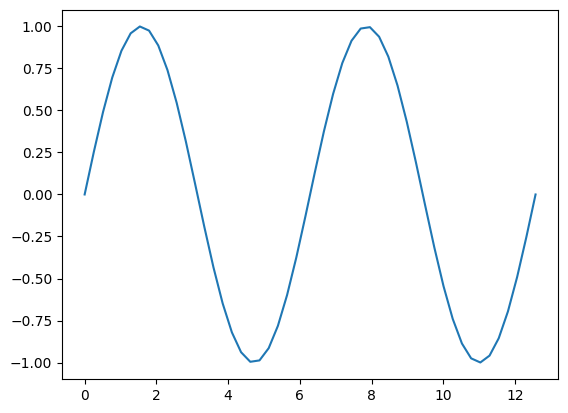

In [5]:
x = np.linspace(0,4*np.pi)  # create a dataset with random values from 0 to 4pi
y = np.array([np.sin(a) for a in x]) #apply the function to the created sample space, in this case a sin curve.  

plt.plot(x, y)



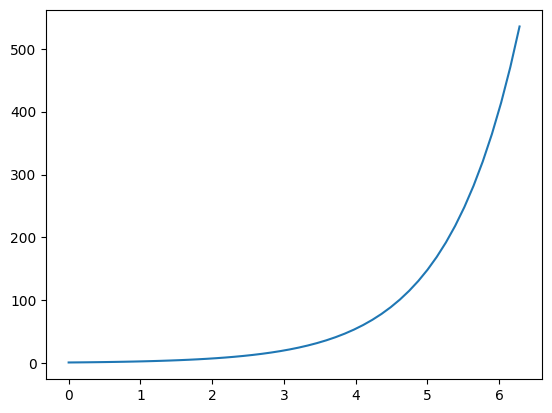

In [6]:
x= np.linspace(0,2*np.pi)
y = np.array([np.exp(a) for a in x])
plt.plot(x,y)

/var/folders/0q/vsvgsd3s4ws83m1fcrysjbvc0000gn/T/ipykernel_3172/1235907502.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.array([np.log(a) for a in x])


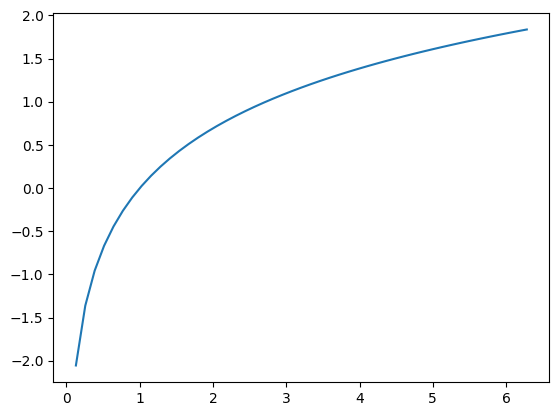

In [7]:

x= np.linspace(0,2*np.pi)
y = np.array([np.log(a) for a in x])
plt.plot(x,y)

This also works with higher-dimensional arrays. Comment this code so that we know you understand what it does and make one change to it and explain what you did. 

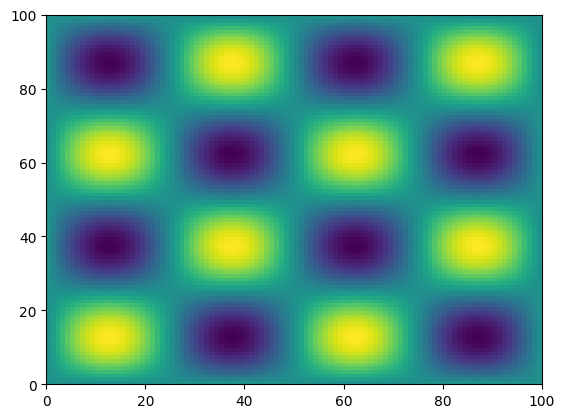

In [8]:
xx = np.linspace(0, 4*np.pi, 100)
yy = np.linspace(0, 4*np.pi, 100)

surface = [[np.sin(xx)*np.sin(yy) for xx in xx] for yy in yy] 
#When both sine values are in phase (both positive or both negative), 
#the product is positive, resulting in a peak or a bright color in the plot.         

plt.pcolor(surface)


In [37]:
import math
xx = np.linspace(0, 4*np.pi, 50)
yy = np.linspace(0, 4*np.pi, 50)
# print(y)
# print(x)
surface = [[np.tan((xx))*np.tan((yy)) for xx in xx] for yy in yy ]
# print(surface)


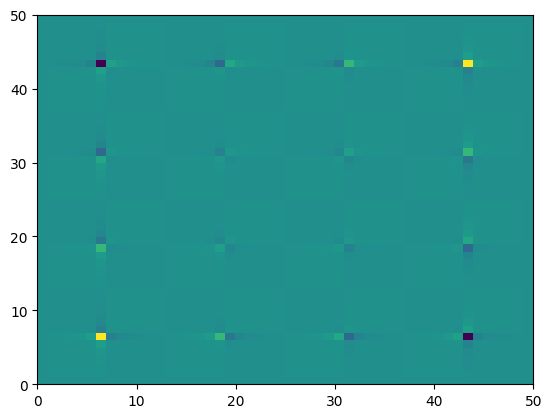

In [38]:
plt.pcolor(surface)


I changed the function from sin to tan function and reduced the size of the sample to 50 so that the distribution of the results is clearly visible. 

In the first code, we saw repeated 

Let's turn to regression now. And, let's use that surface we just made; that will be our secret answer we compare our regression model to. 

Let's suppose our data was taken randomly and we have $10$ points (you will vary this). Be sure you understand this code. 

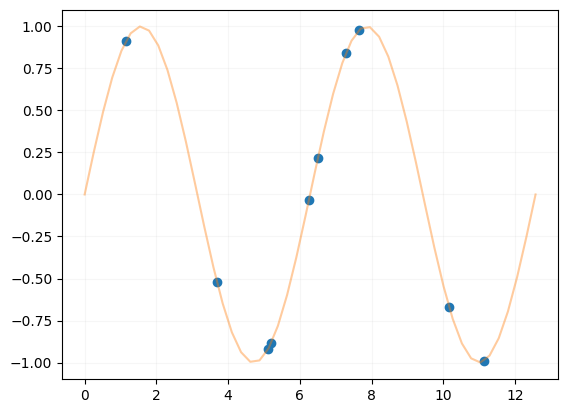

In [42]:
N = 10

x_actual = np.linspace(0, 4*np.pi)
y_actual = np.sin(x_actual)

x_data = np.sort(np.random.rand(N)*4*np.pi) # these are the RBF "centers"
y_data = np.sin(x_data)

plt.plot(x_data, y_data, 'o')
plt.plot(x_actual, y_actual, alpha=0.4)
plt.grid(alpha=0.1)

Now, using this data - the $x$ and $y$ values, interpolate the data using RBF-NN with Gaussians. Use a list comprehension to build the data matrix $X$. 

Here are some hints taken from the previous ICA:
* you can vary the width $L$, but start with $L=1$
* you know the $y$ values and you know the $x$ values from the data
* the $x$ data are the centers of the Gaussians in the basis expansion; we can write:

$$y(x) = \sum_{\mathrm{centers} \:c} w_c e^{(x - x_c)^2/(2L^2)}$$

Write the $\LaTeX$ for the matrix equation you will solve, using something like `pmatrix` or `bmatrix`. 

Solve this equation for the weights $w_c$ using the **pseudoinverse**. (Even though `.solve` and `pinv` are available, do not use them: don't do this `w = np.linalg.pinv(X) @ y_data
`)

Now that you know the weights $w_c$, you can plot your model $y(x)$ for all $x$: use `x_actual` to get a `y_pred` on a fine grid. Include the secret answer and the training data in the same plot. Add a few curves for some values of $L$ and different random centers, either in the same plot or using something like `subplots`. 


### to solve for W matrix, we can consider this logic
$$
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_N \\
\end{bmatrix}
=
\begin{bmatrix}
    e^{-\frac{(x_1 - x_1)^2}{2L^2}} & e^{-\frac{(x_1 - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_1 - x_N)^2}{2L^2}} \\
    e^{-\frac{(x_2 - x_1)^2}{2L^2}} & e^{-\frac{(x_2 - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_2 - x_N)^2}{2L^2}} \\
    \vdots & \vdots & \ddots & \vdots \\
    e^{-\frac{(x_N - x_1)^2}{2L^2}} & e^{-\frac{(x_N - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_N - x_N)^2}{2L^2}} \\
\end{bmatrix}
\begin{bmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_N \\
\end{bmatrix}
$$

Ergo,
$$ 
\begin{bmatrix}
    w_1 \\
    w_2 \\
    \vdots \\
    w_N \\
\end{bmatrix}
=
\begin{bmatrix}
    e^{-\frac{(x_1 - x_1)^2}{2L^2}} & e^{-\frac{(x_1 - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_1 - x_N)^2}{2L^2}} \\
    e^{-\frac{(x_2 - x_1)^2}{2L^2}} & e^{-\frac{(x_2 - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_2 - x_N)^2}{2L^2}} \\
    \vdots & \vdots & \ddots & \vdots \\
    e^{-\frac{(x_N - x_1)^2}{2L^2}} & e^{-\frac{(x_N - x_2)^2}{2L^2}} & \cdots & e^{-\frac{(x_N - x_N)^2}{2L^2}} \\
\end{bmatrix}^ {-1}
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_N \\
\end{bmatrix}
$$


Spoiler alert: the code below might help you with what is above!

In general, you might want to use other radial basis functions, not just Gaussians. You could organize those into functions and make the data matrix $X$ using something like:



Text(0, 0.5, 'i-th data point')

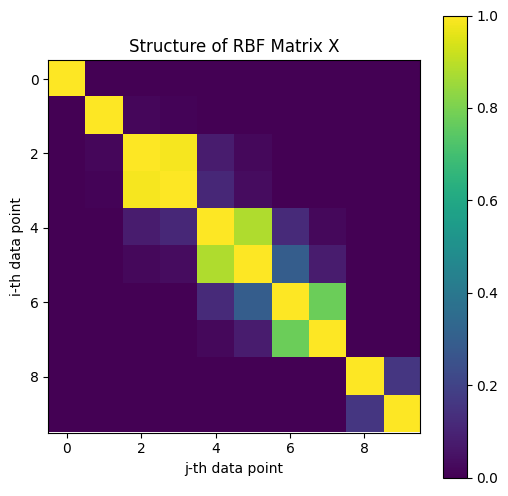

In [48]:
# rerun the random data generation to see many versions of this visualization
def gaussian_rbf(r, sigma=0.5):
    return np.exp(-r**2/(2*sigma**2))

X = [[gaussian_rbf(abs(x_i - x_j)) for x_j in x_data] for x_i in x_data]
X = np.array(X)

plt.figure(figsize=(6, 6))
plt.imshow(X, cmap='viridis')
plt.colorbar()
plt.title('Structure of RBF Matrix X')
plt.xlabel('j-th data point')
plt.ylabel('i-th data point')

In [49]:
L=1
def gaussian_rbf(r,L):
    return np.exp(-r**2/(2*L**2))
X = [[gaussian_rbf(abs(x_i - x_j), L=L) for x_j in x_data] for x_i in x_data]
X = np.array(X)

In [51]:
W = (np.linalg.inv(X.T @ X)@ X.T )@ y_data

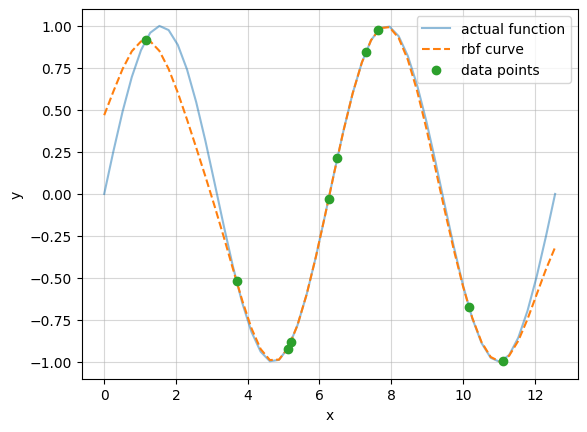

In [55]:
# Generate predictions for the x_actual values
y_pred = np.array([sum(w * gaussian_rbf(abs(x - xc), L=1) for w, xc in zip(W, x_data)) for x in x_actual])
# Plot the observed data, the true sine function, and the RBF approximation
plt.plot(x_actual, y_actual, label="actual function", alpha=0.5)
plt.plot(x_actual, y_pred, label="rbf curve", linestyle='--')
plt.plot(x_data, y_data, 'o', label="data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.5)
plt.show()

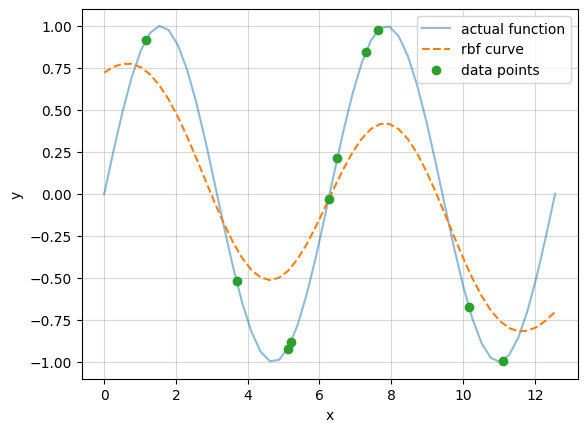

In [56]:
# Generate predictions for the x_actual values
y_pred = np.array([sum(w * gaussian_rbf(abs(x - xc), L=2) for w, xc in zip(W, x_data)) for x in x_actual])
# Plot the observed data, the true sine function, and the RBF approximation
plt.plot(x_actual, y_actual, label="actual function", alpha=0.5)
plt.plot(x_actual, y_pred, label="rbf curve", linestyle='--')
plt.plot(x_data, y_data, 'o', label="data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.5)
plt.show()

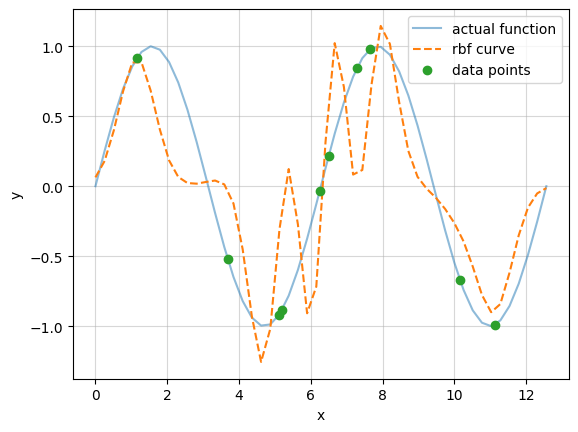

In [57]:
# Generate predictions for the x_actual values
y_pred = np.array([sum(w * gaussian_rbf(abs(x - xc), L=.5) for w, xc in zip(W, x_data)) for x in x_actual])
# Plot the observed data, the true sine function, and the RBF approximation
plt.plot(x_actual, y_actual, label="actual function", alpha=0.5)
plt.plot(x_actual, y_pred, label="rbf curve", linestyle='--')
plt.plot(x_data, y_data, 'o', label="data points")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.5)
plt.show()

____

## Problem 2: Matrix Types and Properties (10 points)

In this problem you will practice making matrices of various types by hand and using `linalg` to "play" with them. Put all of your code in well-commented code cells. 

Your first task: in Python create three matrices that are:
* orthogonal
* symmetric
* postive definite

Give them good variable names and make them easy to change (e.g., size, shape). You might want to re-run to make different variants to test ideas below. 

Your second tasks:
* using Python/Numpy, find the transpose of your orthgonal matrix; one you have it multiply the original by its transpose from the left - describe what you get and why
* using Python/Numpy, find the transpose of your symmetric matrix; subtract this from the original and describe what you get and why 

Your third tasks:
* find the eigenvalues of all of these matrices and examine to see which ones are complex, real, whatever you get: are any of them always real? why or why not? 
* related, find the singular values of the orthgonal matrix and comment on what you see


In [70]:
#1. Orthogonal:
import numpy as np
import random
from scipy.stats import ortho_group # import necessary libraries

# Create a 3x3 orthogonal matrix
matrix1 = ortho_group.rvs(dim=3)

print(matrix1)


    

[[-0.71977316 -0.69415867  0.00838694]
 [ 0.67263454 -0.69436448  0.25577478]
 [ 0.17172469 -0.18974116 -0.96670002]]


In [71]:
mat1transpose = matrix1.transpose()
print(mat1transpose@matrix1)

[[ 1.00000000e+00 -1.34744758e-17  1.94557582e-17]
 [-1.34744758e-17  1.00000000e+00  6.40274270e-17]
 [ 1.94557582e-17  6.40274270e-17  1.00000000e+00]]


The result is that the matrix, is very close to an identity matrix

In [63]:
sym = np.random.randint(1,50,(2,2))
print(sym)
sym = (sym+sym.T) /2
print(sym)
symt = sym.T

[[32 29]
 [ 1 24]]
[[32. 15.]
 [15. 24.]]


In [64]:
diff = sym-symt
print(diff)

[[0. 0.]
 [0. 0.]]


The result is a zero matrix, because both are the same matrices.

In [68]:
X_def = np.random.randint(1, 10, size = (2,2))
X_defT = X_def.T
pos_def = np.dot(X_def, X_defT)+np.eye(2)
print(pos_def)

[[51. 26.]
 [26. 35.]]


In [72]:
print("\nEigenvalues of the Orthogonal Matrix:")
print(np.linalg.eigvals(matrix1))

print("\nEigenvalues of the Symmetric Matrix:")
print(np.linalg.eigvals(sym))

print("\nEigenvalues of the Positive Definite Matrix:")
print(np.linalg.eigvals(pos_def))


Eigenvalues of the Orthogonal Matrix:
[-0.69041883+0.72340987j -0.69041883-0.72340987j -1.        +0.j        ]

Eigenvalues of the Symmetric Matrix:
[43.5241747 12.4758253]

Eigenvalues of the Positive Definite Matrix:
[70.20294102 15.79705898]


____

## Problem 3: SVD Intuition (10 points)

Let's explore the information that is in $V$ from the SVD. 

In this code a fake dataset is made. It uses some matrix products to create a dataset of a controlled shape: comment this code, and perhaps print and plot things so that it makes sense to you.

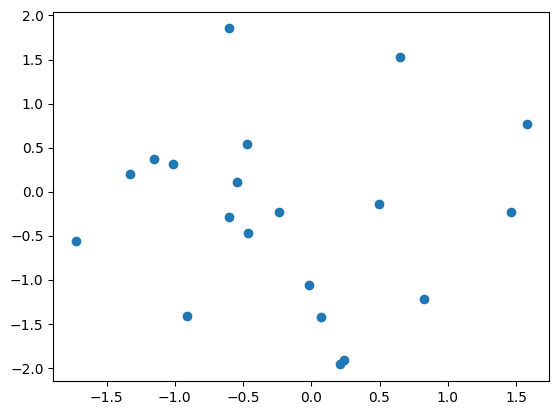

In [74]:
import numpy as np
import matplotlib.pyplot as plt # import required libraries

# Data generation
np.random.seed(42) # to maintain the same random numbers
n_points = 20 
theta = np.pi/6  # 30 degrees
rotation = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]]) #create the rotation matrix
scales = np.array([[3, 0],
                  [0, 0.5]]) #to what extent should the matrix scaled to? scale the x-coordinates by a factor of 3 and the y-coordinates by a factor of 0.5.
X_init= np.random.randn(n_points,2)
plt.scatter(X_init[:,0], X_init[:,1])
X_data = (rotation @ scales @ X_init.transpose()).transpose()




[[ 1.3250673   0.68520103]
 [ 1.30198672  1.63102408]
 [-0.54981407 -0.45261434]
 [ 3.91105657  2.70112821]
 [-1.35537024 -0.46927619]
 [-1.08756205 -0.89679344]
 [ 1.10695648 -0.46553124]
 [-4.3408961  -2.83085439]
 [-2.70997427 -1.38317359]
 [-2.00603982 -1.97358155]
 [ 3.86431128  2.10070915]
 [ 0.53163047 -0.51564175]
 [-1.44207845 -0.7685432 ]
 [-3.08429354 -1.56380835]
 [-1.48758165 -1.02726513]
 [-2.02634918 -0.10049994]
 [ 0.22936091 -0.4782481 ]
 [ 2.44224528  0.70517656]
 [ 1.03256107 -0.53526666]
 [-3.49994389 -1.90703566]]


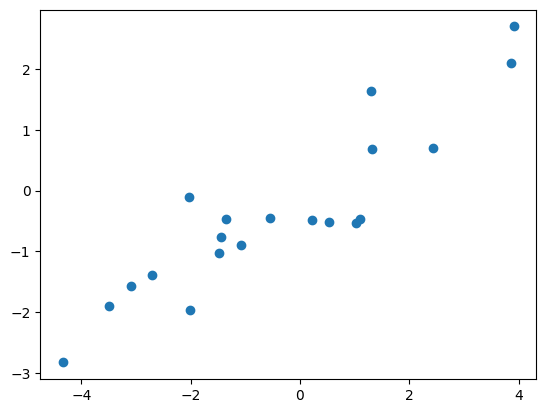

In [75]:

print(X_data)
plt.scatter(X_data[:,0], X_data[:,1])

Use `linalg` to find the SVD matrices $U$, $\Sigma$ and $V$ for this data matrix. What are the sizes of these three matrices and what sizes does `linalg` return? 

In [30]:
u,s,vt = np.linalg.svd(X_data)
v=vt.T
print(u.shape)
print(s.shape)
print(v.shape)

(20, 20)
(2,)
(2, 2)


Make a scatterplot of the data. From $V$ and $\Sigma$ plot the principal components as arrows on the scatterplot. 

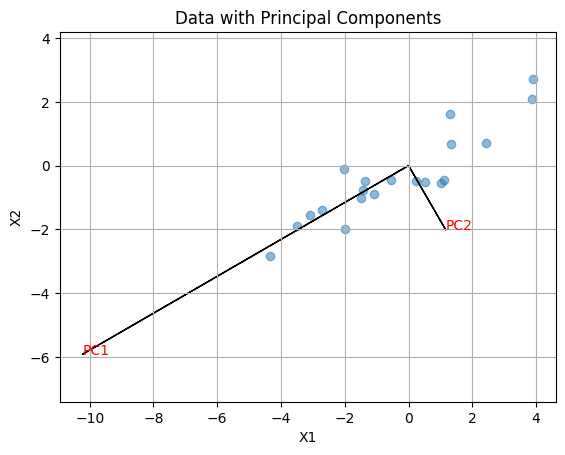

In [34]:
plt.scatter(X_data[:, 0], X_data[:, 1], alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data with Principal Components')

for i in range(v.shape[1]):
    plt.arrow(0,0,s[i]*v[0,i], s[i]*v[1,i])
    plt.text(s[i] * v[0, i], s[i] * v[1, i], f'PC{i+1}', color='red')
plt.grid()
plt.axis('equal')
plt.show()

How much of the variance of the data is explained by the first principal component? Vary the parameters of the data generation and desribe the trends you see. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate and print variance explained by the first principal component
def variance_explained(X):
    U, Sigma, VT = np.linalg.svd(X, full_matrices=False)
    total_variance = np.sum(Sigma**2)
    variance_pc1 = Sigma[0]**2 / total_variance
    print(f"Variance explained by PC1: {variance_pc1 * 100:.2f}%")
    return variance_pc1

# Generating data with different parameters and observing trends
# Case 1: Isotropic data (equal variance in both dimensions)
X1 = np.random.randn(100, 2)
variance_explained(X1)

# Case 2: Anisotropic data with higher variance in the first dimension
X2 = np.random.randn(100, 2) * [3, 1]
variance_explained(X2)

# Case 3: Correlated data
X3 = np.random.multivariate_normal([0, 0], [[3, 2.5], [2.5, 3]], 100)
variance_explained(X3)


Variance explained by PC1: 57.22%
Variance explained by PC1: 93.02%
Variance explained by PC1: 92.35%


0.923498485710284

____

## Problem 4: Confounding Variables (10 points)

In this problem, we will explore how a confounding variable affects our ability to estimate the true relationship between a predictor and an outcome. Read through the code below, understand it, look at the plots and then the numerical results. Answer the questions below all of that. This should help you understand this issue more concretely than you might have gotten from the textbook. 

Our variables are:
* $y$: the outcome variable
* $x$: the predictor of interest
* $z$: a confounding variable

The true relationships in our data are:
* $z = 0.7x + \epsilon_z$
* $y = 2x + 3z + \epsilon_y$

This code uses a method called "residual regression".  The residual regression method works as follows:
1. First regress x on z: 
   * $x = \beta_1z + \epsilon_1$
   * Save residuals: $r_x = x - \hat{x} = x - \beta_1z$
2. Then regress y on z:
   * $y = \beta_2z + \epsilon_2$
   * Save residuals: $r_y = y - \hat{y} = y - \beta_2z$
3. Finally, regress $r_y$ on $r_x$:
   * $r_y = \beta_3r_x + \epsilon_3$
   * The coefficient $\beta_3$ estimates the true effect of x on y

This method removes the confounding effect of z by working with the parts of x and y that are uncorrelated with z (the residuals).

We will analyze this in two ways:
1. Naive Analysis: directly regressing y on x, ignoring z
2. Controlled Analysis: accounting for the confounding effect of z




Naive Analysis (y ~ x):
Coefficient: 4.085
P-value: 3.609e-59

Controlled Analysis (accounting for z):
Coefficient: 2.127
P-value: 5.896e-28


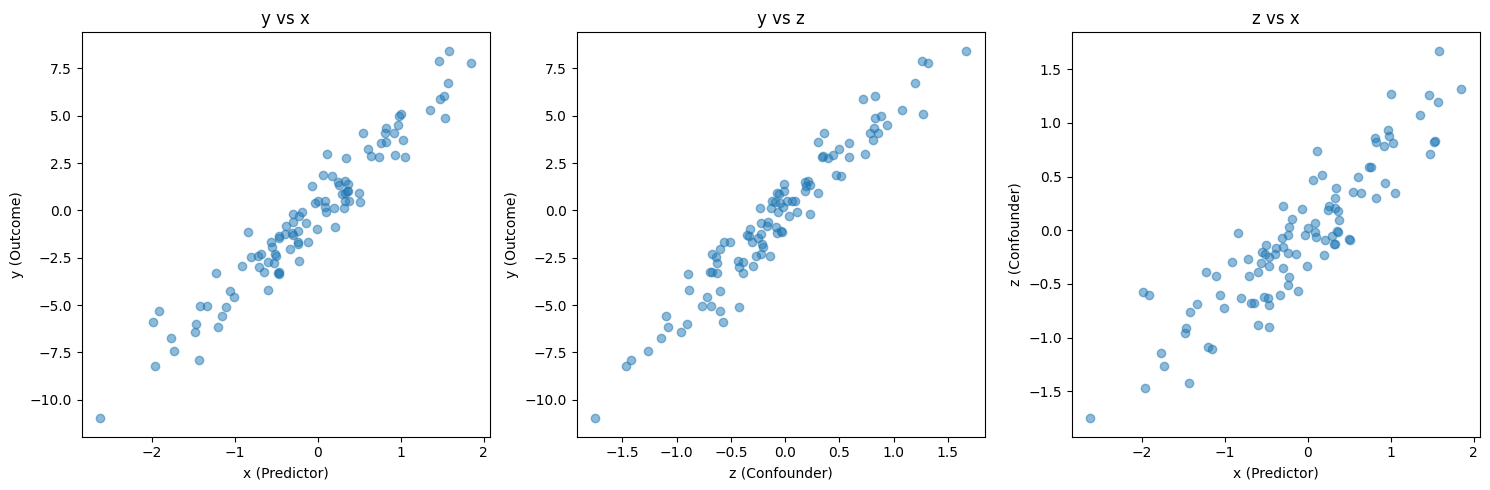

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate data
x = np.random.normal(0, 1, n)
z = 0.7*x + 0.3*np.random.normal(0, 1, n)  # confounder
y = 2*x + 3*z + np.random.normal(0, 0.5, n)  # outcome

# Create figure with plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot relationships
ax1.scatter(x, y, alpha=0.5)
ax1.set_xlabel('x (Predictor)')
ax1.set_ylabel('y (Outcome)')
ax1.set_title('y vs x')

ax2.scatter(z, y, alpha=0.5)
ax2.set_xlabel('z (Confounder)')
ax2.set_ylabel('y (Outcome)')
ax2.set_title('y vs z')

ax3.scatter(x, z, alpha=0.5)
ax3.set_xlabel('x (Predictor)')
ax3.set_ylabel('z (Confounder)')
ax3.set_title('z vs x')

plt.tight_layout()

# Naive Analysis: regressing y on x directly
naive_model = stats.linregress(x, y)
print("\nNaive Analysis (y ~ x):")
print(f"Coefficient: {naive_model.slope:.3f}")
print(f"P-value: {naive_model.pvalue:.3e}")

# Controlled Analysis
# Step 1: Get residuals of x after controlling for z
model_xz = stats.linregress(z, x)
predicted_x = model_xz.slope * z + model_xz.intercept
residuals_x = x - predicted_x

# Step 2: Get residuals of y after controlling for z
model_yz = stats.linregress(z, y)
predicted_y = model_yz.slope * z + model_yz.intercept
residuals_y = y - predicted_y

# Step 3: Regress residuals to get controlled effect
controlled_model = stats.linregress(residuals_x, residuals_y)
print("\nControlled Analysis (accounting for z):")
print(f"Coefficient: {controlled_model.slope:.3f}")
print(f"P-value: {controlled_model.pvalue:.3e}")

Answer the following questions:

1. (3 pts) Initial Analysis:
   - Looking at the scatter plots, describe the relationship between x and y- positive linear relationship 
   - Looking at the scatter plots, describe the relationship between x and z - positive linear relationship
   - In the Naive Analysis, what is the estimated coefficient for x? How does this compare to the true effect (β = 2)?4, estimated value of beta is 4, because x and z are correlated, Naive analysis will not only pick the effect of x on y, but also z on y, and the effect of z on x gets added up, 2+0.3*7 = 4

2. (3 pts) Understanding Confounding:
   - Given that y = 2x + 3z + ε, explain why the coefficient in the Naive Analysis is $\neq$ 2. This is because of the indirect relationship of z on y,the coefficient in the naive regression is typically biased and will not be equal to the true value of 2. 
   - Looking at the x vs z plot, what does the pattern tell you about how z confounds the relationship? there is a positive correlation between x and z
   - Why do we need to control for z to get the true effect of x on y? - there is direct correlation between x and z, this cannot be ignored because y is correlated to x, impact in z will indirectly impact y. 

3. (2 pts) Residual Analysis:
   - The residuals rx (from x ~ z) represent what's left of x after removing z's effect - 
   - The residuals ry (from y ~ z) represent what's left of y after removing z's effect
   - Why does regressing ry on rx help us find the true effect of x on y? It helps us understand the true effect of x on y by removing the influence of the confounder z.

4. (2 pts) Final Results:
   - What is the coefficient in the Controlled Analysis? 2.127
   - Is this closer to the true value (β = 2)? Explain why this makes sense. This makes sense because the variables of z is controlled, the dependency of z is removed while regressing y on x. 

____

## Problem 5: Biplot (10 points)

In this question you will explore scree and biplots. The code is given: comment it in detail to prove you totally understand what it does. Then, you will answer questions below. 


Feature loadings (scaled by singular values):
alcohol                  : PC1 = -4.1772, PC2 = -10.1965
malic_acid               : PC1 =  7.0962, PC2 = -4.7421
ash                      : PC1 =  0.0594, PC2 = -6.6634
alcalinity_of_ash        : PC1 =  6.9264, PC2 =  0.2233
magnesium                : PC1 = -4.1095, PC2 = -6.3170
total_phenols            : PC1 = -11.4223, PC2 = -1.3712
flavanoids               : PC1 = -12.2406, PC2 =  0.0708
nonflavanoid_phenols     : PC1 =  8.6402, PC2 = -0.6067
proanthocyanins          : PC1 = -9.0713, PC2 = -0.8286
color_intensity          : PC1 =  2.5647, PC2 = -11.1735
hue                      : PC1 = -8.5875, PC2 =  5.8869
od280/od315_of_diluted_wines: PC1 = -10.8871, PC2 =  3.4680
proline                  : PC1 = -8.2992, PC2 = -7.6930


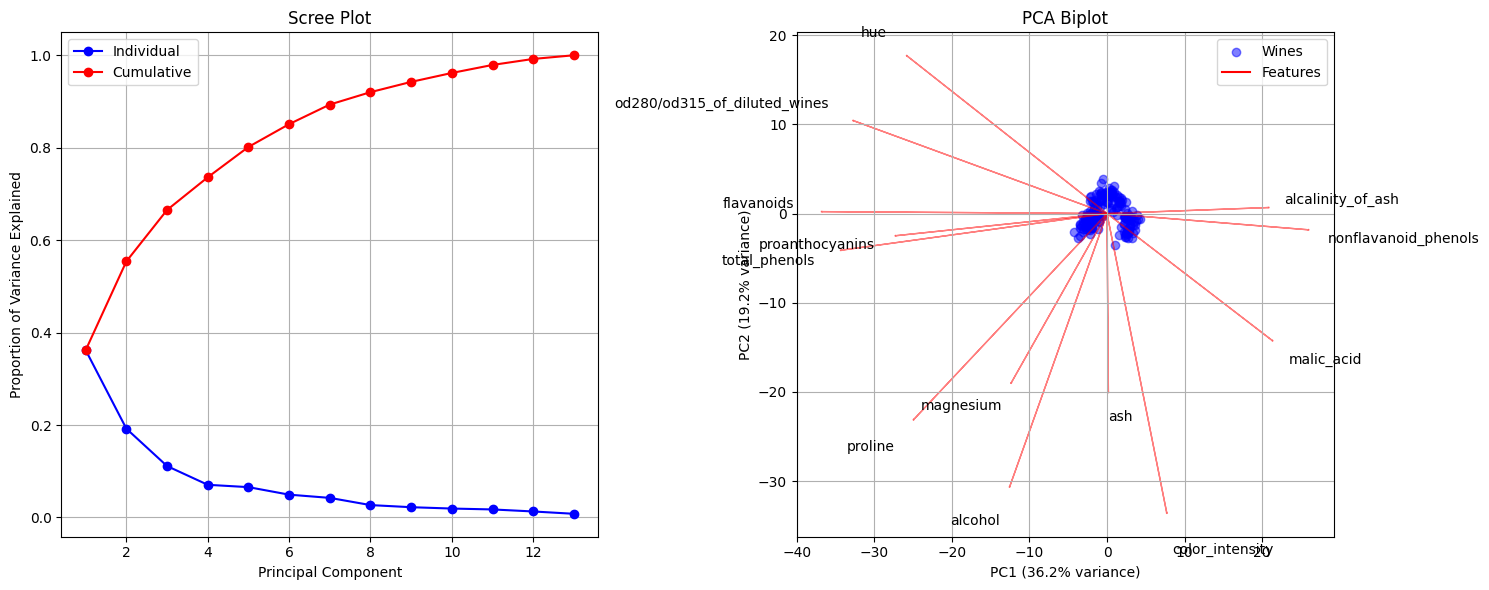

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # we are considering the wine dataset
from sklearn.preprocessing import StandardScaler #import required libraries

# Load and prepare data
wine = load_wine()
X = wine.data
X_scaled = StandardScaler().fit_transform(X) #scale the dataset to have mean 0 and standard deviation of 1

# Perform PCA
U, s, Vt = np.linalg.svd(X_scaled) # decompose the  data to get the singular, sigma and the V matrices
V = Vt.T

# Create figure with both scree and biplot
fig = plt.figure(figsize=(15, 6)) 

# 1. Scree plot
plt.subplot(121)
var_exp = s**2 / np.sum(s**2) # find the average of the square of the values of sigma matrix, the square of the diagonal elements of Sigma is the variance because a matrix 
#Covariance matric C can be written as A.T @ A and A can be decomposed into U, Sigma and V transpose, when C is decomposed, it can be written as V, sigma^2 and V.T
cum_var_exp = np.cumsum(var_exp) # get the sum of the calculated var_exp

plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual')
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)

# 2. Biplot
plt.subplot(122)
scores = X_scaled @ V # 
scale = 3  # Adjust this to change relative scaling of arrows

# Plot scores
plt.scatter(scores[:,0], scores[:,1], c='b', alpha=0.5, label='Wines')

# Plot loadings
for i, feature in enumerate(wine.feature_names):
    x = V[i,0] * s[0] * scale
    y = V[i,1] * s[1] * scale
    
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.1)
    
    # Add labels with offset based on quadrant
    if x >= 0:
        ha = 'left'
    else:
        ha = 'right'
    if y >= 0:
        va = 'bottom'
    else:
        va = 'top'
        
    plt.text(x*1.1, y*1.1, feature, ha=ha, va=va)

plt.xlabel(f"PC1 ({var_exp[0]:.1%} variance)")
plt.ylabel(f"PC2 ({var_exp[1]:.1%} variance)")
plt.title('PCA Biplot')
plt.grid(True)

# Add legend
plt.plot([0], [0], 'r-', label='Features')
plt.legend()

plt.tight_layout()

# Print feature loadings for reference
print("\nFeature loadings (scaled by singular values):")
for name, v1, v2 in zip(wine.feature_names, 
                       V[:,0] * s[0], 
                       V[:,1] * s[1]):
    print(f"{name:25s}: PC1 = {v1:7.4f}, PC2 = {v2:7.4f}")


#### Scree Plot Analysis (4 points)
1. (2 pts) Using the scree plot:
   - How many components would you keep based on the "elbow" criterion?
   - What is the cumulative variance explained by these components?

2. (2 pts) Looking at the relationship between individual and cumulative variance:
   - What percentage of variance is explained by PC1 alone?
   - How much additional variance does PC2 capture?
   - Based on these numbers, justify whether using only PC1 would be sufficient.

#### Biplot Interpretation (6 points)
3. (2 pts) Feature groupings:
   - Which features point in similar directions along PC1? 
   - Find two features that point in nearly perpendicular directions. What does this suggest about their relationship?

4. (2 pts) Feature representation:
   - Identify two features that would be poorly represented if we only kept PC1.
   - Explain why these features would be poorly represented (hint: look at their orientation).

5. (2 pts) Chemical interpretation:
   - Based on which features align strongly with PC1, what chemical property seems to explain the most variation in wines?
   - Looking at PC2's strongest features, what might this second component represent chemically?

For reference, the features are:
- alcohol
- malic_acid
- ash
- alcalinity_of_ash
- magnesium
- total_phenols
- flavanoids
- nonflavanoid_phenols
- proanthocyanins
- color_intensity
- hue
- od280/od315_of_diluted_wines
- proline

Note: In your answers, refer to specific features by name and support your interpretations with observations from the plots.